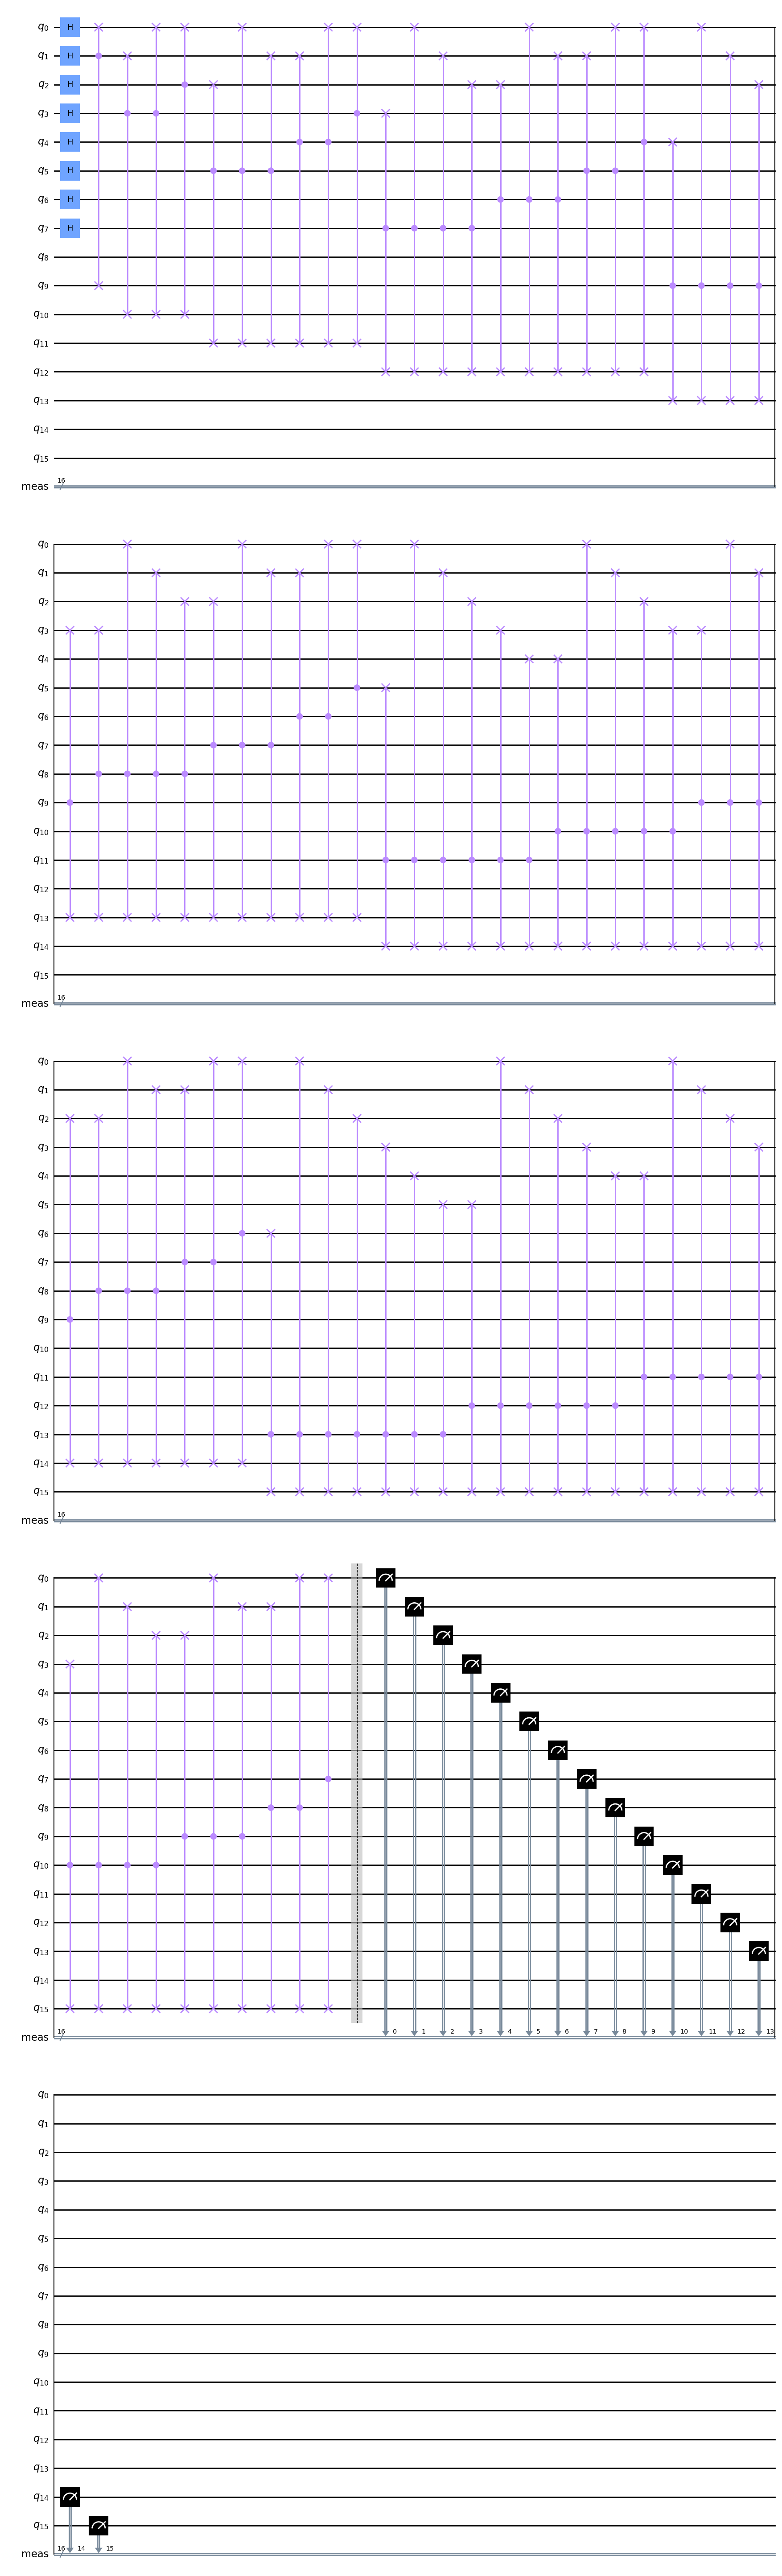

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram

# Total number of inputs
n = 8

# Random n numbers
a = np.random.randint(0, 2**n, size=n)

# Check if n is a power of 2
if not (n and (not (n & (n - 1)))) or len(a) != n:
    raise ValueError("n must be a power of 2 and len(a) must be n")

# Initialize the circuit and the registers
circuit = QuantumCircuit(2*n, name="bitonic_sort")
a_reg = [i for i in range(n)]
c_reg = [i + n for i in range(n)]

# Apply Hadamard gates to all input qubits
circuit.h(a_reg)

# Apply the bitonic sort operations recursively
for k in range(1, n):
    for j in range(k, 0, -1):
        circuit.cswap(j + k - 1, j - 1, c_reg[k])
        for i in range(j - 1):
            circuit.cswap(j + k - 1, i, c_reg[k])

# Measure the qubits and run the circuit
circuit.measure_all()
circuit_drawer(circuit, output='mpl')

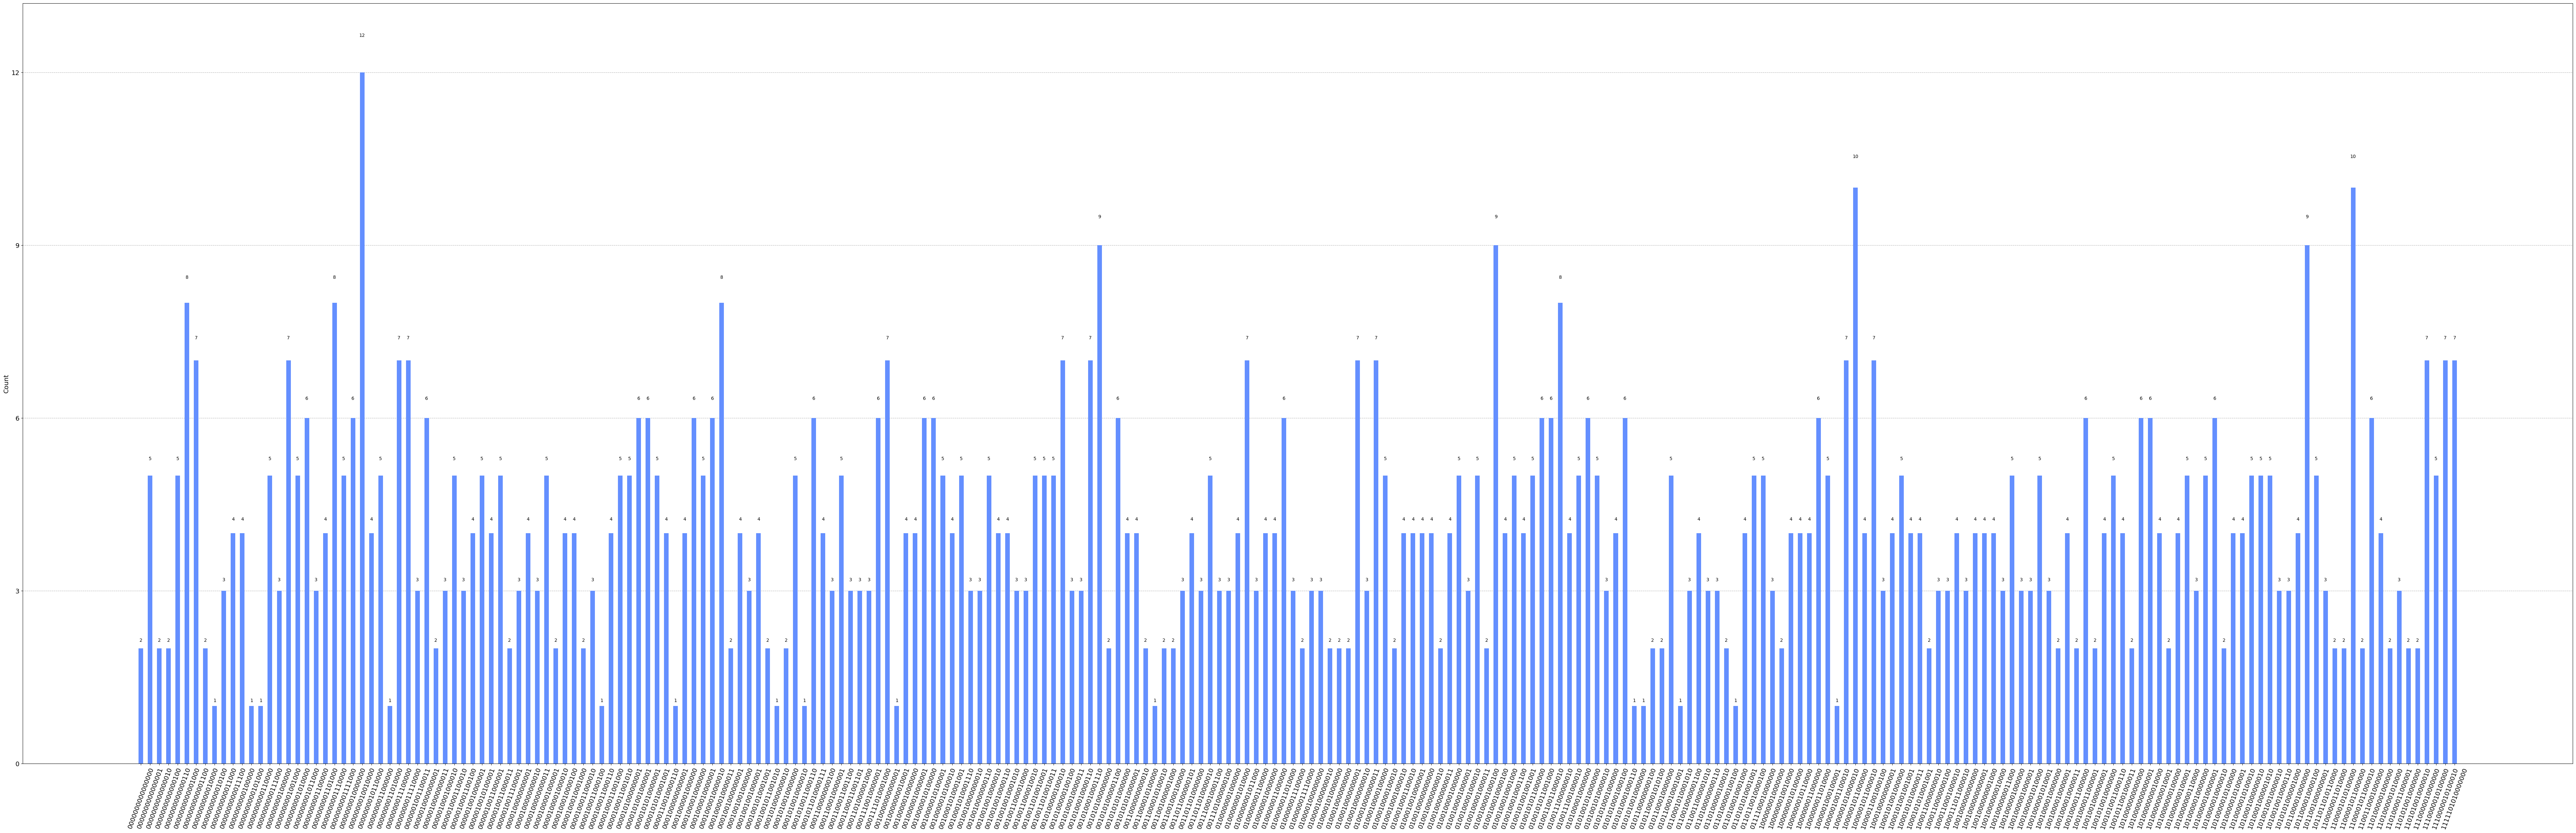

In [2]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
job = execute(circuit, backend=backend, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts, figsize=(100,30))

In [3]:
# Extract the sorted output from the measurement results
output = [int(key[::-1], 2) for key in sorted(counts.keys())]

print(f"Input array: {a}")
print(f"Sorted array: {output}")

Input array: [ 90 134  16  76 169  69 153 114]
Sorted array: [0, 32768, 16384, 8192, 24576, 4096, 12288, 2048, 10240, 6144, 14336, 1024, 5120, 3072, 7168, 512, 4608, 2560, 6656, 1536, 5632, 3584, 7680, 256, 2304, 3328, 768, 2816, 1792, 3840, 50752, 32800, 49184, 16928, 17952, 9760, 33056, 34080, 33568, 49952, 34592, 32784, 16400, 49168, 33296, 16912, 8464, 4368, 17168, 8976, 25360, 4880, 21264, 32848, 33360, 33104, 37200, 24880, 32776, 520, 264, 33032, 16648, 49416, 32840, 584, 33352, 37192, 21320, 16424, 296, 16680, 25384, 57704, 8216, 33048, 13080, 45848, 4184, 33080, 4472, 32772, 34820, 260, 33028, 1284, 34052, 17668, 37188, 28996, 16420, 24612, 16676, 24868, 20772, 2148, 18532, 35172, 51556, 17428, 9236, 49428, 24852, 28948, 84, 12372, 340, 33108, 16396, 1292, 17676, 4172, 1100, 41068, 364, 16748, 12572, 8284, 514, 2562, 6658, 1538, 258, 770, 2818, 1794, 3842, 66, 16450, 322, 34, 32802, 16418, 49186, 1058, 17442, 16930, 17954, 33058, 18, 16402, 49170, 530, 33298, 16914, 49682, 8722